In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Use a Gibbs sampler to generate samples of the Ising model

In [196]:
def IsingGibbs(b, L, n, cut):
    """
    generate samples of Ising model using a Gibbs sampler.
    
    Parameters
    ----------
    b: scalar
       parameter in density.
    L: integer
       size of lattice.
    n: integer
       number of samples to generate.
    cut: integer
       pre-chain truncated before Markov process reaches stationarity
       
    Returns
    -------
    X: list of length n+1
       - X[i] is 2D array, L x L matrix(with values in {-1, 1})
    f: 1D array of length n
       values of the magnetization
    
    """
    f = np.zeros(n)
    X = []
    #initilization
    #X.append(np.random.choice([-1,1],size=L**2,p=[0.5,0.5]).reshape(L,L))
    X.append(np.reshape(2*np.random.binomial(1,0.5, L**2) - 1, (L, L)))
    for i in range(n):
        Y = X[i]
        #ramdom pick up a point on Lattic
        indexi, indexj = np.random.randint(L, size=2)
        #sum of neighboring sites
        scalar = Y[indexi,(indexj+1)%L] + Y[(indexi+1)%L,indexj] + Y[indexi,(indexj-1)%L] + Y[(indexi-1)%L,indexj]
        #probability for the new value to be +1
        posprob = np.exp(2*b*scalar)/(np.exp(2*b*scalar) + np.exp(-2*b*scalar))
        #update the point
        new = 2*np.random.binomial(1,posprob,1) - 1
        Y[indexi, indexj] = new
        X.append(Y)
        #compute magnetization
        f[i] = np.sum(Y)
    return f[cut:], X[cut:]

a histogram of the values of the magnetization

$f(\sigma)=\sum_{i \in Z_{L}^{2}}\sigma_{i}$

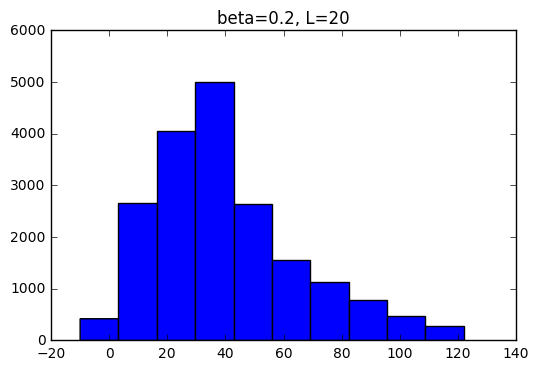

In [199]:
test1 = IsingGibbs(0.2, 20, 20000,1000)
plt.hist(test1[0])
plt.title("beta=0.2, L=20")
plt.show()

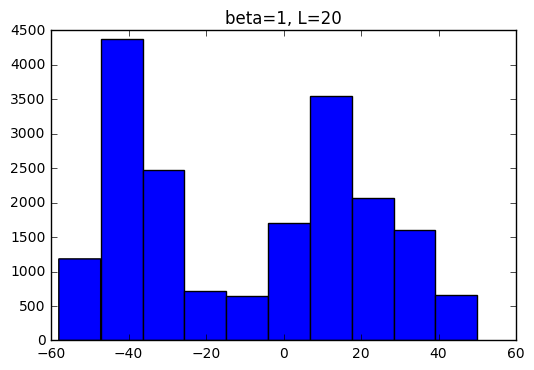

In [186]:
test2 = IsingGibbs(1, 20, 20000)
bins=np.arange(min(test2[0]), max(test2[0]))
plt.hist(test2[0][1000:])
plt.title("beta=1, L=20")
plt.show()

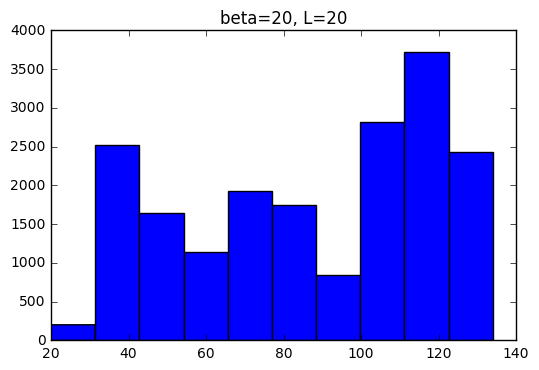

In [190]:
test3 = IsingGibbs(20, 20, 20000)
bins=np.arange(min(test3[0]), max(test3[0]))
plt.hist(test3[0][1000:])
plt.title("beta=20, L=20")
plt.show()

In [194]:
def autocorr(mag):
    """"
    compute autocorralation and intergrated autocorrelation time for magnetization
    
    Parameter
    ---------
    mag : 1D array
        magnetizations for markov chain
        
    Returns
    -------
    act: scalar
       intergrated autocorrelation time
    autocorr: 1D array
            - autocorr[i]:autocorralation for lag = i  
            
    """"
    n = len(mag)
    kappa = n/2
    autocorr = np.zeros(kappa)
    mag = mag - np.mean(mag)
    for s in range(1,kappa):
        autocorr[s] = np.mean( mag[:-s] * mag[s:] ) / np.var(mag)
    act = 1 + 2 * np.sum(autocorr)
    return act, autocorr
